<a href="https://colab.research.google.com/github/MaiaPiko/MaiaPiko/blob/main/Red_List.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset description: 
Table 6a: number of animal species (kingdom: Animalia) listed in each IUCN Red List Category by country in Europe.

Source: https://www.iucnredlist.org/statistics

Here are the descriptions for the columns:

EX: Number of Extinct Species

EW: Number of Extinct in the Wild Species

Subtotal (EX+EW): Total number of Extinct and Extinct in the Wild Species

CR: Number of Critically Endangered Species

EN: Number of Endangered Species

VU: Number of Vulnerable Species

NT: Number of Near Threatened Species

LC: Number of Least Concern Species

DD: Number of Data Deficient Species

LR/cd: Number of species listed as Critically Endangered or Endangered in a conservation dependent status.

NT or LR/nt: Number of species listed as Near Threatened or Lower Risk/conservation dependent.


Note:
The original dataset contained the column:EX+EW+ CR(PE)+CR(PEW) which
Represents the total number of species that are facing the highest risk of extinction and require urgent conservation action to prevent their loss. - I changed its name to "HR" as in "Highest Risk" for simplification purposes and to preserve the integrity of the data.

Another column that I changed is the 'Subtotal (threatened spp.)' column which refers to the sum total of species that are categorized as threatened according to the IUCN Red List of Threatened Species.


The 'Subtotal (threatened spp.)' is often used in reports or analyses to indicate the total number of species that are at risk of extinction and to help prioritize conservation efforts. The IUCN Red List provides a global overview of the conservation status of species, and the 'Subtotal (threatened spp.)' is one of the key indicators used to track progress towards achieving conservation goals. I renamed this column to 'TH' as in 'Threat' or 'Threatened.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


In [ ]:
df = pd.read_csv('6a-Europe.csv')

In [ ]:
df.head()

,Name,EX,EW,EX+EW,CR(PE),CR(PEW),HR,CR,EN,VU,TH,LR/cd,NT or LR/nt,LC or LR/lc,DD,Total
0,Åland Islands,0,0,0,0,0,0,0,0,0,0,0,0,23,1,24
1,Albania,1,0,1,0,0,1,24,51,77,152,0,87,1063,73,1376
2,Andorra,0,0,0,0,0,0,0,4,10,14,0,22,323,7,366
3,Austria,3,0,3,4,0,7,27,60,52,139,0,91,907,69,1209
4,Belgium,1,0,1,0,0,1,6,11,37,54,0,52,754,39,900


In [ ]:
df.shape

(48, 16)

In [ ]:
df.columns

Index(['Name', 'EX', 'EW', 'EX+EW', 'CR(PE)', 'CR(PEW)', 'HR', 'CR', 'EN',
       'VU', 'TH', 'LR/cd', 'NT or LR/nt', 'LC or LR/lc', 'DD', 'Total'],
      dtype='object')

About the data:
The column EX+EW+ CR(PE)+CR(PEW) :
Represents the total number of species that are facing the highest risk of extinction and require urgent conservation action to prevent their loss. - I will change its name to "HR" as in "Highest Risk".

The column 'Subtotal (threatened spp.)' refers to the sum total of species that are categorized as threatened according to the IUCN Red List of Threatened Species.


The 'Subtotal (threatened spp.)' is often used in reports or analyses to indicate the total number of species that are at risk of extinction and to help prioritize conservation efforts. The IUCN Red List provides a global overview of the conservation status of species, and the 'Subtotal (threatened spp.)' is one of the key indicators used to track progress towards achieving conservation goals. I will rename this column to 'TH' as in 'Threat' or 'Threatened.

In [ ]:
df.tail()

,Name,EX,EW,EX+EW,CR(PE),CR(PEW),HR,CR,EN,VU,TH,LR/cd,NT or LR/nt,LC or LR/lc,DD,Total
43,Spain,2,0,2,11,0,13,86,183,248,517,0,288,2233,485,3525
44,Svalbard and Jan Mayen,0,0,0,0,0,0,0,2,11,13,0,8,76,3,100
45,Sweden,0,0,0,0,0,0,6,9,42,57,0,60,728,32,877
46,Switzerland,6,0,6,0,0,6,6,45,57,108,0,80,846,60,1100
47,United Kingdom,3,0,3,2,0,5,19,21,67,107,0,66,1032,65,1273


Our data is clean. There are no "Na" values.

In [ ]:
df.isna().sum()

Name           0
EX             0
EW             0
EX+EW          0
CR(PE)         0
CR(PEW)        0
HR             0
CR             0
EN             0
VU             0
TH             0
LR/cd          0
NT or LR/nt    0
LC or LR/lc    0
DD             0
Total          0
dtype: int64

In [ ]:
df.rename(columns={'LC or LR/lc': 'LC'}, inplace=True)  # rename the column
df['LC'] = pd.to_numeric(df['LC'], errors='coerce')  # convert the column back to numeric data type


In [ ]:
df.rename(columns = {'NT or LR/nt':'NT'}, inplace=True)  # rename the column
df['NT'] = pd.to_numeric(df['NT'], errors='coerce')

In [ ]:
df.columns

Index(['Name', 'EX', 'EW', 'EX+EW', 'CR(PE)', 'CR(PEW)', 'HR', 'CR', 'EN',
       'VU', 'TH', 'LR/cd', 'NT', 'LC', 'DD', 'Total'],
      dtype='object')

In [ ]:
f"The country with the highest number of extinct species is {df.Name.loc[df.EX.idxmax()]}, the number of extint species there is {df.EX.max()}"

'The country with the highest number of extinct species is France, the number of extint species there is 8'

In [ ]:
f"The country with the highest number of critically endangered species is {df.Name.loc[df.CR.idxmax()]}, the number of critically endangered species there is {df.CR.max()}"

'The country with the highest number of critically endangered species is Portugal, the number of critically endangered species there is 114'

**I guess Europe does not really have animals exitinct in the wild?**





In [ ]:
f"The country with the highest number of species extinct in the wild is {df.Name.loc[df.EW.idxmax()]}, the number of species extinct in the wild there is {df.EW.max()}"

'The country with the highest number of species extinct in the wild is Åland Islands, the number of species extinct in the wild there is 0'

**Good job Aland Islands**

In [ ]:
f"The country with the highest number of Least Concern Species is {df.Name.loc[df.LC.idxmin()]}, the number of Least Concern Species there is {df.LC.min()}"


'The country with the highest number of Least Concern Species is Åland Islands, the number of Least Concern Species there is 23'

**I hope spain does something about this. :(**

In [ ]:
f"The country with the highest number of near extinct species is {df.Name.loc[df.NT.idxmax()]}, the number of near extinct species there is {df.NT.max()}"


'The country with the highest number of near extinct species is Spain, the number of near extinct species there is 288'

In [ ]:
df.head()

,Name,EX,EW,EX+EW,CR(PE),CR(PEW),HR,CR,EN,VU,TH,LR/cd,NT,LC,DD,Total
0,Åland Islands,0,0,0,0,0,0,0,0,0,0,0,0,23,1,24
1,Albania,1,0,1,0,0,1,24,51,77,152,0,87,1063,73,1376
2,Andorra,0,0,0,0,0,0,0,4,10,14,0,22,323,7,366
3,Austria,3,0,3,4,0,7,27,60,52,139,0,91,907,69,1209
4,Belgium,1,0,1,0,0,1,6,11,37,54,0,52,754,39,900


In [ ]:
TH_Descending = df.sort_values('TH', ascending = False)

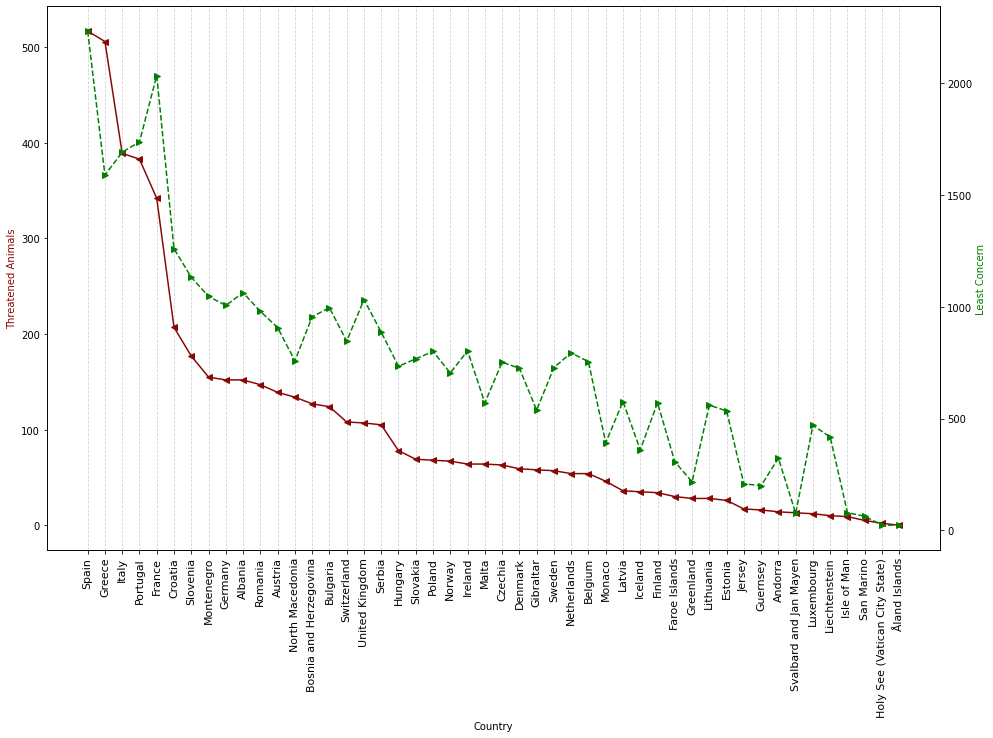

In [ ]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 
# plt.figure(figsize=(16,10)) 


ax1.plot(TH_Descending.Name, TH_Descending['TH'], color='#880808', marker="<")
ax2.plot(TH_Descending.Name, TH_Descending['LC'], color='green', marker=">", linestyle="--")

# Set x-axis tick positions and labels
ax1.set_xticks(range(len(TH_Descending.Name)))
ax1.set_xticklabels(TH_Descending.Name, fontsize=11, rotation=90)


# Set axis labels
ax1.set_xlabel("Country")
ax1.set_ylabel("Threatened Animals", color='#880808', rotation =90)
ax2.set_ylabel("Least Concern", color='green')

ax1.grid(which='major', axis='x', linestyle='--', color='#D3D3D3')

# Increase figure size
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.show()

**To see the overall conservation status of each country: **



1.   I started by sorting my data by the number of Threatened Species.
2.   Then I plotted the number of Threatened Species against the number of Least Concern Species.

Looks like the countries with highest number of Threatened Species also have a high number of Least Concern/safe species, which suggests that they have a diverse fauna.

That being said... Looks like Greece could apply more conservation measures.

This graph also suggests that France has a better overall conservation status than most other countries. Keep it up, France!

After considering this Dataset I have decided that it would be much easier to work with it if I created a country column, that gets the country code from the 'age,sex,indic_il, unit, geo/time'.

In [ ]:
mmi.columns


Index(['age,sex,indic_il,unit,geo\time', '2022 ', '2021 ', '2020 ', '2019 ',
       '2018 ', '2017 ', '2016 ', '2015 ', '2014 ', '2013 ', '2012 ', '2011 ',
       '2010 ', '2009 ', '2008 ', '2007 ', '2006 ', '2005 ', '2004 ', '2003 ',
       '2001 ', '2000 ', '1999 ', '1998 ', '1997 ', '1996 ', '1995 '],
      dtype='object')

In [ ]:
# Extract the country code from the 'age,sex,indic_il,unit,geo\time' column
mmi['country'] = mmi['age,sex,indic_il,unit,geo\\time'].apply(lambda x: x.split(',')[-1])


In [ ]:
# Rename the 'age,sex,indic_il,unit,geo\time' column to 'country'
df = df.rename(columns={'age,sex,indic_il,unit,geo\\time': 'country'})

In [ ]:
mmi.head()

,"age,sex,indic_il,unit,geo\time",2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2004,2003,2001,2000,1999,1998,1997,1996,1995,country
0,"TOTAL,F,MED_E,EUR,AL",:,:,2482,2195,1972,1747,:,:,:,...,:,:,:,:,:,:,:,:,:,AL
1,"TOTAL,F,MED_E,EUR,AT",:,27048,26348,25241,24675,24433,23202,22741,22712,...,16603,15275 b,14667,14535,13888,13677,13841,14277,13394,AT
2,"TOTAL,F,MED_E,EUR,BE",26826,25356,25135,24013 b,23135,21976,21550,21012,21189,...,15353,14994 b,15081,14378,13885,13669,13707,13735,13085,BE
3,"TOTAL,F,MED_E,EUR,BG",5117,5012,4424,4059,3474,3480,3043 b,3236,3260,...,:,:,:,:,:,:,:,:,:,BG
4,"TOTAL,F,MED_E,EUR,CH",:,43909,41911,40146,42253,42640,43091,38361,37278 b,...,:,:,:,:,:,:,:,:,:,CH
